Type percentage of training set (between 0 and 100): 70

------------------DATASET SEPARATION: -------------------
Class:  Setosa ----qtd train:  35 ----qtd test:  15
Class:  Versicolor ----qtd train:  35 ----qtd test:  15
Class:  Virginica ----qtd train:  35 ----qtd test:  15


-----------------AVERAGE AND STANDARD DEVIATION FROM EACH CLASS-----------
--------Class:  Setosa
---Average:   5.045714285714285    3.4685714285714284    1.477142857142857    0.2428571428571428  
---Standard Deviation:   0.35724569947854995    0.3693789603192507    0.17085618728829774    0.09938586931957763  
--------Class:  Versicolor
---Average:   6.00857142857143    2.7685714285714287    4.314285714285714    1.342857142857143  
---Standard Deviation:   0.5261023412506237    0.31511578694770825    0.466073481112065    0.21285234893930485  
--------Class:  Virginica
---Average:   6.617142857142857    2.937142857142857    5.6257142857142854    1.9771428571428573  
---Standard Deviation:   0.6859761404787504   

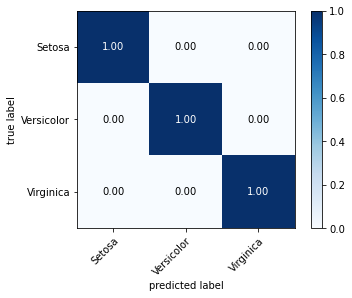

In [2]:
import math
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

def separate_train_test(variables,classes): #separate classes between train and test
    unique_classes= np.unique(classes)
    train_variables=np.zeros([0,variables.shape[1]])
    test_variables=np.zeros([0,variables.shape[1]])
    train_classes=np.zeros([0,1]) #assumed class is a vector
    test_classes=np.zeros([0,1])  #assumed class is a vector
    
    percentage = int(input("Type percentage of training set (between 0 and 100): "))
    
    for i in range(len(unique_classes)):
        count=0
        amount=np.count_nonzero(classes==unique_classes[i])  # count occurence of class in the vector
        for j in range(len(classes)):        
            if classes[j]==unique_classes[i]:   #builds 1 class at a time
                count+=1
                if count/amount <=percentage/100: #condition if it is forming train set

                    train_variables=np.append(train_variables, [variables[j]],axis = 0)
                    train_classes=np.append(train_classes, [[classes[j]]],axis = 0)
                    
                else: #condition if it is forming test set
                    test_variables=np.append(test_variables, [variables[j]],axis = 0)
                    test_classes=np.append(test_classes, [[classes[j]]],axis = 0)                    
    print('\n------------------DATASET SEPARATION: -------------------')
    for i in range(len(unique_classes)): #loop to print info of each class
        train_qtd=np.count_nonzero(train_classes==unique_classes[i])  #count occurence of class in vector
        test_qtd=np.count_nonzero(test_classes==unique_classes[i])  #count occurence of class in vector
        print("Class: ", unique_classes[i], "----qtd train: ",train_qtd,"----qtd test: ",test_qtd)
    print('\n')                
                    
                    
    return train_variables,test_variables,train_classes,test_classes

def print_confusion_matrix(multiclass,classes_name):
#show confusion matrix:-----------------------------------------
    #logic to make confusion matrix figure
    print('---------------------NORMALIZED CONFUSION MATRIX-----------------------')
    fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                    colorbar=True,
                                    show_absolute=False,
                                    show_normed=True,
                                    class_names=classes_name)
    plt.show()
    return

class Naive_bayes:
    def __init__(self,train_variables,test_variables,train_classes,test_classes):
        
        self.train_variables=train_variables
        self.test_variables=test_variables
        self.train_classes=train_classes
        self.test_classes=test_classes
        self.average=None
        self.std=None
        
    def calculate_average_standard_deviation(self): #calculate all standard deviations necessary
        unique_classes= np.unique(self.train_classes)
        prob_classes=[]

        for i in range(len(unique_classes)): #calculate probability of each class
            x=np.count_nonzero(self.train_classes==unique_classes[i])#count occurence of class in vector
            prob=x/len(self.train_classes)
            prob_classes.append(prob)

        #calculate probability standard deviation for each variable for each class
        average=[] #create variable to hold variables averages of each class
        std=[] #create variable to hold variables standard deviation of each class
        for i in range(len(unique_classes)):
            small_list_avg=[]
            small_list_std=[]
            for j in range(self.train_variables.shape[1]): 
                x=self.train_classes == unique_classes[i]
                y=self.train_variables[:,j]
                y=y.reshape(y.shape[0],1)
                data1=np.array(y[x]) #data1 handles the array of each variable that exists for each class during loop
                #print(data1)
                #logic to calculate average and standard deviation
                #average
                small_list_avg.append(np.average(data1))
                small_list_std.append(np.std(data1))   
            average.append(np.array(small_list_avg)) #hold all averages from all variables from each class
            std.append(np.array(small_list_std))  #hold all standard deviation from all variables from each class

        #logic to print relevant information
        print('-----------------AVERAGE AND STANDARD DEVIATION FROM EACH CLASS-----------')
        for i in range(len(unique_classes)):
            print('--------Class: ',unique_classes[i])
            print('---Average: ', end = '')
            for j in range(len(average[i])):
                print(' ',average[i][j],' ', end = '')
            print('')
            print('---Standard Deviation: ', end = '')
            for j in range(len(std[i])):
                print(' ',std[i][j],' ', end = '')
            print('')
        self.average=average
        self.std=std

    def calculate_gaussian_prob(self,input_v, average,std): #calculate probability based in gaussian model
        prob1=1/(math.sqrt(2*math.pi)*std) #1/(sqrt(2pi)*std)
        prob2=math.exp(-(pow(input_v-average, 2))/(2*pow(std,2))) #exp(-(X-u)²/(2*std²))
        prob=prob1*prob2
        return prob

    def find_highest_probability(self,input_v, average,std): #calculate highest probability using gaussian method
        qtd_classes=len(average)

        #calculate all probabilities
        class_prob=[]
        for i in range(qtd_classes):
            small_prob=[]
            for j in range(len(input_v)):
                small_prob.append(self.calculate_gaussian_prob(input_v[j],average[i][j],std[i][j]))
                #print(small_prob)
            class_prob.append(np.array(small_prob))
        #print()
        #print(class_prob)

        #decide which has the greatest probability
        prob_index=0 #variable that holds the class index with highest probability
        prob_value=0 #variable that holds the class index with highest probability

        for i in range(qtd_classes):
            partial_prob=1
            for j in range(len(input_v)):
                partial_prob=partial_prob*class_prob[i][j]
            if partial_prob>prob_value:
                prob_index=i
                prob_value=partial_prob      
        return prob_index,prob_value

    def test_naive_bayes(self): #show confusion matrix

        actual=[] #create list to hold right answers
        predicted=[] #create list to hold answers predicted

        for i in range(len(self.test_variables)): #finds predicted class for each test_class
            x=self.find_highest_probability(self.test_variables[i],self.average,self.std)
            predicted.append(x[0])  
        
        #show confusion matrix:-----------------------------------------
        classes_name=np.unique(self.test_classes)
        from sklearn.metrics import confusion_matrix
        #converting classes to numbers:
        for i in range(len(classes_name)):
            for j in range(len(self.test_classes)):
                if (classes_name[i]==self.test_classes[j][0]):
                    actual.append(i)
        multiclass=np.array(confusion_matrix(actual, predicted))#create numpy array with confusion matrix
        print("-----------CONFUSION MATRIX------------")
        print(multiclass)
        
        #calculating accuracy
        correct=0
        for i in range(len(actual)):
            if actual[i]==predicted[i]:
                correct+=1
        accuracy=correct/len(actual)
        print('Accuracy: ',accuracy)
        return(multiclass, classes_name)
        

#-----------------------------BEGIN-----------------------------    

iris  = pd.read_csv('iris.csv') #load iris dataset
variables= iris.loc[:, ["sepal.length", "sepal.width", "petal.length", "petal.width"]].values
classifications= iris.loc[:, ["species"]].values.flatten()

z=separate_train_test(variables,classifications) # separate dataset train/test sets
test1=Naive_bayes(z[0],z[1],z[2],z[3]) #create class naive bayes
test1.calculate_average_standard_deviation() #calculte average and standard deviations of class
matrix,classes= test1.test_naive_bayes() #test naive_bayes with test set
print_confusion_matrix(matrix,classes) #print normalized confusion matrix
